# Mental Health Review and Analysis

# Requirement

# Analyze the dataset below to determine:

Which social economic risk factors are associated with depression patients in Kenya?

 Which demographic category in Kenya faces a high risk of depression ?


## **Data**

### Datasets below provided train set


## Importing Essential Libraries

In [12]:


import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical Processing on arrays and matrices
import matplotlib.pyplot as plt #Generating visualizations
import seaborn as sns #Visualizations based on matplot lib



# Dataset link

In [13]:
# url = https://docs.google.com/spreadsheets/d/1c1rREs8KLFFk6q7Foq0ymQEzAmx5e7pGjaTJQdiv758/edit#gid=1331535495

In [14]:
import os
os.getcwd()

'/content'

In [15]:
url ='/content/train.csv'

## Data Loading

In [16]:
df_mental = pd.read_csv(url)

In [17]:
df_mental

,Unnamed: 0,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,0,926,91,23-nov.-61,1,28.0,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,1,747,57,24-oct.-61,1,23.0,1,3,5,8,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,2,1190,115,05-oct.-61,1,22.0,1,3,5,9,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.832920,526.671080,196.98904,24.023054,49.647648,0.0,0,289.173520,36.434967,0.0,0.000000,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.500000,1.500000,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.671880,8.260629,173.52654,19.218445,0.000000,0.5,0,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.250000,0.500000,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
5,5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,8.0,63.790752,359.374660,73.67070,0.000000,0.000000,1.7,0,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,4.993681,7.5,3.0,7.5,0.0,1.0,1.0,1.0,1.601537,NaN,NaN,0.125000,0.000000,1.000000,0.875000,0.0,1,1,NaN,32.030739,6.406148,0.800000,0.000000,1.50,0,0,444.25610,7.662910,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,6
6,6,849,130,31-oct.-61,0,34.0,0,1,3,9,1,3.0,60.614365,4.130314,219.25041,0.000000,0.000000,1.0,0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,0.022244,20.0,3.0,20.0,0.0,1.0,0.0,1.0,0.053385,NaN,0.160154,1.000000,1.000000,0.333333,0.000000,0.0,1,1,NaN,6.406148,6.406148,1.000000,0.000000,1.00,0,0,225.62288,0.556089,0,0.0,0,0.000

In [18]:
df_mental.iloc[:10]

,Unnamed: 0,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,0,926,91,23-nov.-61,1,28.0,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,1,747,57,24-oct.-61,1,23.0,1,3,5,8,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,2,1190,115,05-oct.-61,1,22.0,1,3,5,9,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.832920,526.671080,196.98904,24.023054,49.647648,0.0,0,289.173520,36.434967,0.0,0.000000,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.500000,1.500000,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.671880,8.260629,173.52654,19.218445,0.000000,0.5,0,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.250000,0.500000,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
5,5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,8.0,63.790752,359.374660,73.67070,0.000000,0.000000,1.7,0,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,4.993681,7.5,3.0,7.5,0.0,1.0,1.0,1.0,1.601537,NaN,NaN,0.125000,0.000000,1.000000,0.875000,0.0,1,1,NaN,32.030739,6.406148,0.800000,0.000000,1.50,0,0,444.25610,7.662910,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,6
6,6,849,130,31-oct.-61,0,34.0,0,1,3,9,1,3.0,60.614365,4.130314,219.25041,0.000000,0.000000,1.0,0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,0.022244,20.0,3.0,20.0,0.0,1.0,0.0,1.0,0.053385,NaN,0.160154,1.000000,1.000000,0.333333,0.000000,0.0,1,1,NaN,6.406148,6.406148,1.000000,0.000000,1.00,0,0,225.62288,0.556089,0,0.0,0,0.000

In [19]:
#Check number of rows and columns
df_mental.shape

(10, 76)

In [20]:
df_mental = df_mental.sort_values( by ='surveyid',ascending = True)

In [21]:
df_mental.head(5)

,Unnamed: 0,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
9,9,390,33,28-nov.-61,1,29.0,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,0,0.0,0,0,3
5,5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,8.0,63.790752,359.374660,73.67070,0.000000,0.0,1.7,0,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.0,4.993681,7.5,3.0,7.5,0.0,1.0,1.0,1.0,1.601537,NaN,NaN,0.125000,0.00,1.000000,0.875000,0.0,1,1,NaN,32.030739,6.406148,0.80,0.00,1.50,0,0,444.25610,7.662910,0,0.0,0,0.000000,0.000000,0,0.0,0,0,6
1,1,747,57,24-oct.-61,1,23.0,1,3,5,8,0,NaN,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.0,0,1,3
4,4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.671880,8.260629,173.52654,19.218445,0.0,0.5,0,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.0,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.500000,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.0,0,0,3
6,6,849,130,31-oct.-61,0,34.0,0,1,3,9,1,3.0,60.614365,4.130314,219.25041,0.000000,0.0,1.0,0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.0,0.022244,20.0,3.0,20.0,0.0,1.0,0.0,1.0,0.053385,NaN,0.160154,1.000000,1.00,0.333333,0.000000,0.0,1,1,NaN,6.406148,6.406148,1.00,0.00,1.00,0,0,225.62288,0.556089,0,0.0,0,0.000000,0.000000,0,0.0,0,1,3


In [22]:
#Display Sample records to validate records successfully imported 
pd.set_option('display.max_rows', 500)


## **Data Understanding**
## **Data** **Structure** 


- Dataset information. To check total counts per column, not null constraints and data types
- Dataset description.
- Distinct values per column to identify categorical values
-Null values per column to identify missing values


In [23]:
#Dataframe Information to check data types, not null constraints
print(df_mental.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 9 to 7
Data columns (total 76 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10 non-null     int64  
 1   surveyid                 10 non-null     int64  
 2   village                  10 non-null     int64  
 3   survey_date              10 non-null     object 
 4   femaleres                10 non-null     int64  
 5   age                      10 non-null     float64
 6   married                  10 non-null     int64  
 7   children                 10 non-null     int64  
 8   hhsize                   10 non-null     int64  
 9   edu                      10 non-null     int64  
 10  hh_children              10 non-null     int64  
 11  hh_totalmembers          6 non-null      float64
 12  cons_nondurable          10 non-null     float64
 13  asset_livestock          10 non-null     float64
 14  asset_durable            10 n

In [24]:
#Descriptive statistics
df_mental.describe()

,Unnamed: 0,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.0,10.000000,10.000000,9.0,10.000000,10.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,6.0,6.000000,6.000000,6.000000,3.000000,0.0,4.000000,6.000000,6.000000,5.000000,6.000000,5.000000,10.0,10.0,0.0,6.000000,6.000000,6.000000,6.000000,5.000000,10.000000,10.0,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,4.50000,877.200000,85.700000,0.800000,31.000000,0.800000,3.600000,5.600000,9.500000,2.200000,5.666667,146.155454,212.732981,111.891382,13.452911,17.777061,0.7200,0.0,112.974690,8.651236,0.0,0.558250,0.512492,0.320307,2.514413,8.195866,21.399738,0.200000,0.200000,0.100000,0.200000,0.0,3.683535,0.480461,6.719782,3.659623,4.097265,8.464234,3.050000,0.600000,5.083333,0.0,2.500000,0.666667,0.500000,0.818563,NaN,1.149103,0.344907,0.315476,0.766667,0.400463,0.400000,1.0,1.0,NaN,50.288261,12.852334,0.702778,0.569445,0.950000,0.200000,0.0,339.006159,28.755707,0.0,0.0,0.100000,1.281230,1.281230,0.300000,0.124920,0.0,0.200000,3.000000
std,3.02765,300.505796,51.968046,0.421637,10.974718,0.421637,1.837873,1.837873,0.707107,2.616189,2.422120,199.087880,364.819443,106.535333,21.700679,29.861496,1.2891,0.0,156.996032,15.875745,0.0,1.765342,1.307213,0.441513,4.587101,14.511656,29.269814,0.421637,0.421637,0.316228,0.421637,0.0,10.073994,1.519351,11.533502,8.903864,8.862224,17.570837,6.431044,1.264911,7.876653,0.0,1.378405,0.516398,0.547723,0.774229,NaN,0.944624,0.367509,0.383603,0.324893,0.497867,0.547723,0.0,0.0,NaN,65.115900,9.476140,0.191606,0.823975,0.570088,0.421637,0.0,450.321386,49.928583,0.0,0.0,0.316228,2.804596,2.804596,0.483046,0.395031,0.0,0.421637,1.943651
min,0.00000,390.000000,25.000000,0.000000,21.000000,0.000000,1.000000,3.000000,8.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.053385,NaN,0.160154,0.000000,0.000000,0.333333,0.000000,0.000000,1.0,1.0,NaN,6.406148,6.406148,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.25000,761.750000,45.750000,1.000000,24.000000,1.000000,2.250000,4.250000,9.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [25]:
#Describer Non Integer variables
df_cat = df_mental.dtypes[df_mental.dtypes == 'object'].index
df_mental[df_cat].describe()

,survey_date
count,10
unique,10
top,12-Sep-61
freq,1


In [26]:
#Unique values for each column.
for col in list(df_mental):
    print(col)
    print(df_mental[col].unique())

Unnamed: 0
[9 5 1 4 6 0 8 3 2 7]
surveyid
[ 390  483  747  806  849  926  930 1065 1190 1386]
village
[ 33  25  57  42 130  91 195  97 115  72]
survey_date
['28-nov.-61' '08-Sep-61' '24-oct.-61' '12-Sep-61' '31-oct.-61'
 '23-nov.-61' '12-nov.-61' '23-Sep-61' '05-oct.-61' '03-Sep-61']
femaleres
[1 0]
age
[29. 35. 23. 59. 34. 28. 32. 27. 22. 21.]
married
[1 0]
children
[4 6 3 1 7 2]
hhsize
[6 8 5 3 9 4]
edu
[10  8  9]
hh_children
[0 6 4 1 7 2]
hh_totalmembers
[nan  8.  6.  3.  9.  4.]
cons_nondurable
[  0.        63.790752 258.67188   60.614365 581.57416  378.83292
 118.07046 ]
asset_livestock
[   0.        359.37466     8.260629    4.130314 1108.7568    526.67108
  120.13633 ]
asset_durable
[  0.       73.6707  173.52654 219.25041 252.24208 196.98904 203.23505]
asset_phone
[ 0.       19.218445 24.023054 67.264557]
asset_savings
[ 0.       80.076851 49.647648 48.046108]
asset_land_owned_total
[0.  1.7 0.5 1.  4. ]
asset_niceroof
[0]
cons_allfood
[  0.        40.938339 173.01099   48.9631

In [27]:
#Unique values for each column.
df_mental.nunique()

Unnamed: 0                 10
surveyid                   10
village                    10
survey_date                10
femaleres                   2
age                        10
married                     2
children                    6
hhsize                      6
edu                         3
hh_children                 6
hh_totalmembers             5
cons_nondurable             7
asset_livestock             7
asset_durable               7
asset_phone                 4
asset_savings               4
asset_land_owned_total      5
asset_niceroof              1
cons_allfood                7
cons_ownfood                7
cons_alcohol                1
cons_tobacco                2
cons_med_total              4
cons_med_children           4
cons_ed                     7
cons_social                 7
cons_other                  7
ent_wagelabor               2
ent_ownfarm                 2
ent_business                2
ent_nonagbusiness           2
ent_employees               1
ent_nonag_

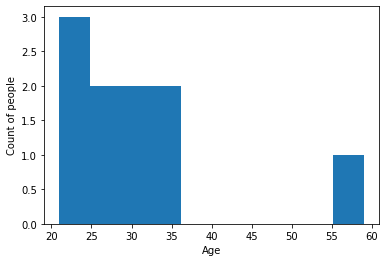

In [28]:
#Age Distribution
h=plt.hist(df_mental['age'], bins =10)
plt.ylabel('Count of people');
plt.xlabel('Age');
plt.show()

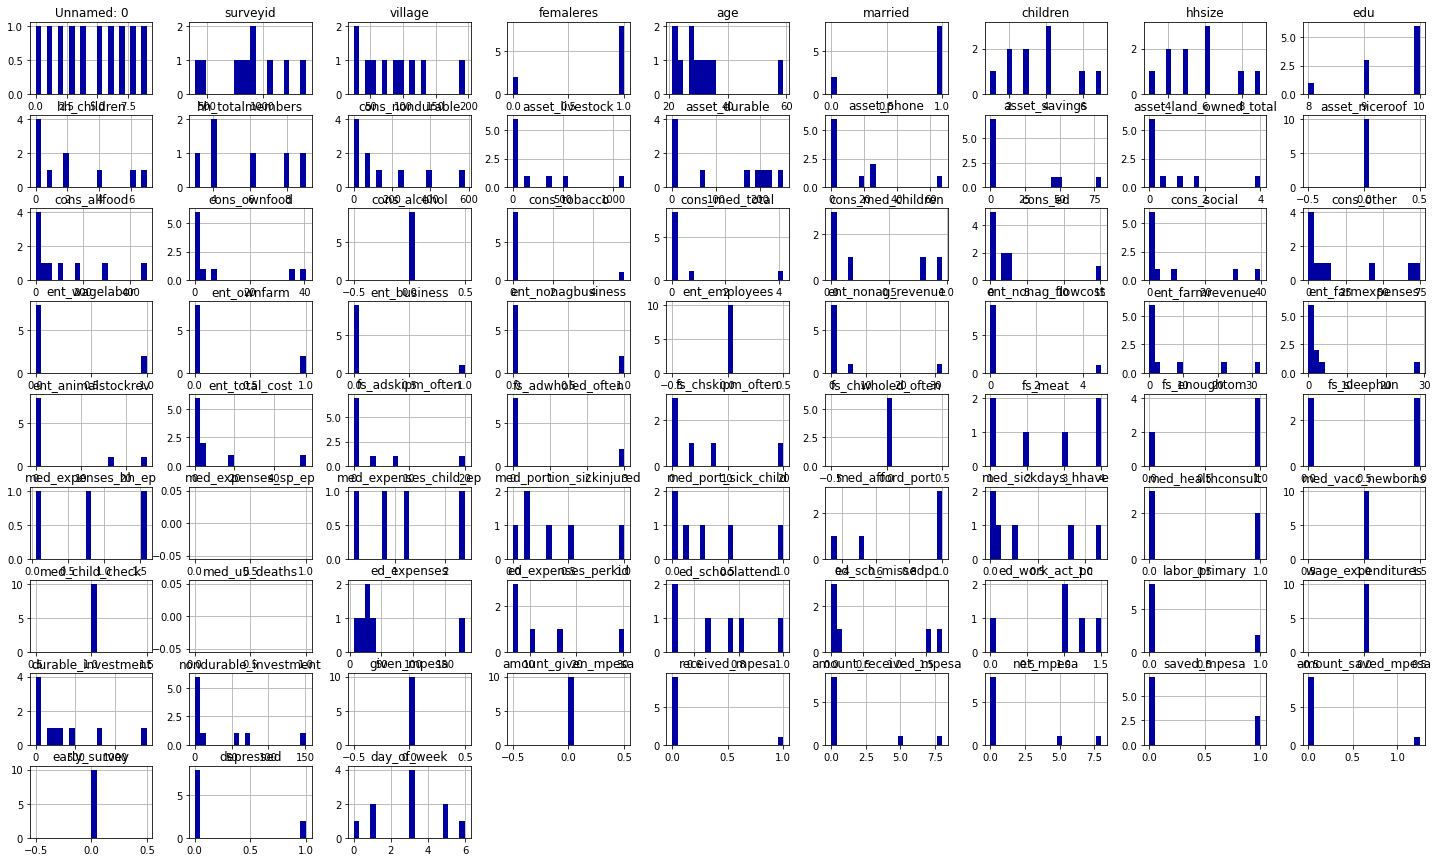

In [29]:
# Distribution
df_mental.hist( bins=20, figsize=(25,15), color='#0000A0', zorder=2, rwidth=10)
plt.show()

In [30]:


df_mental



,Unnamed: 0,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
9,9,390,33,28-nov.-61,1,29.0,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
5,5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,8.0,63.790752,359.374660,73.67070,0.000000,0.000000,1.7,0,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,4.993681,7.5,3.0,7.5,0.0,1.0,1.0,1.0,1.601537,NaN,NaN,0.125000,0.000000,1.000000,0.875000,0.0,1,1,NaN,32.030739,6.406148,0.800000,0.000000,1.50,0,0,444.25610,7.662910,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,6
1,1,747,57,24-oct.-61,1,23.0,1,3,5,8,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
4,4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.671880,8.260629,173.52654,19.218445,0.000000,0.5,0,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.250000,0.500000,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
6,6,849,130,31-oct.-61,0,34.0,0,1,3,9,1,3.0,60.614365,4.130314,219.25041,0.000000,0.000000,1.0,0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,0.022244,20.0,3.0,20.0,0.0,1.0,0.0,1.0,0.053385,NaN,0.160154,1.000000,1.000000,0.333333,0.000000,0.0,1,1,NaN,6.406148,6.406148,1.000000,0.000000,1.00,0,0,225.62288,0.556089,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,3
0,0,926,91,23-nov.-61,1,28.0,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
8,8,930,195,12-nov.-61,1,32.0,1,7,9,9,7,9.0,581.574160,1108.756800,252.24208,24.023054,80.076851,4.0,0,469.092860,40.572273,0.0,0.000000,0.000000,0.000000,15.134524,30.162281,67.184479,1,0,0,0,0,0.000000,0.000000,32.564587,28.738691,24.690361,55.964821,3.0,0.0,3.0,0.0,4.0,1.0,0.0,NaN,NaN,2.402306,0.111111,0.142857,1.000000,0.111111,0.0,1,1,NaN,181.614290,30.269049,0.666667,0.166667,1.00,1,0,1401.83810,151.176190

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Gender')

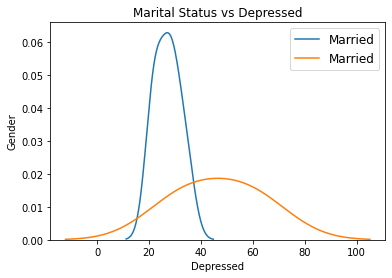

In [31]:
df_mental_married = df_mental[df_mental.married == 1]
sns.distplot(df_mental_married['age'], hist = False, kde = True, label='Married')
df_mental_married = df_mental[df_mental.married == 0]
sns.distplot(df_mental_married['age'], hist = False, kde = True, label='Married')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Marital Status vs Depressed')
plt.xlabel('Depressed')
plt.ylabel('Gender')


## Correlation

In [32]:
#To find the correlation among the columns using pearson method 
df_mental.corr(method ='pearson')

,Unnamed: 0,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
Unnamed: 0,1.000000,-0.215792,0.109811,-0.087039,1.070061e-01,-0.087039,0.219649,0.219649,2.335497e-01,0.406800,0.308957,0.323676,0.359397,0.473447,0.349386,0.400536,0.458344,NaN,0.347570,0.239711,NaN,0.058026,-0.179847,-0.853123,0.468742,0.115075,0.211324,2.611165e-01,-8.703883e-02,0.290129,-8.703883e-02,NaN,-0.166277,0.058026,0.334105,0.437347,0.256715,0.375491,0.252513,1.740777e-01,0.186619,NaN,0.426562,0.207020,-0.487950,-0.517139,NaN,0.411159,0.280789,0.343380,0.486664,-0.329543,-0.288675,NaN,NaN,NaN,0.658911,0.743935,0.079042,-0.773048,0.410365,2.611165e-01,NaN,0.411335,0.414762,NaN,NaN,-4.061812e-01,-0.481999,-0.481999,-0.645777,-0.174078,NaN,-1.740777e-01,-3.776275e-01
surveyid,-0.215792,1.000000,0.466371,0.087167,-3.499463e-01,0.087167,-0.426747,-0.426747,-4.026339e-02,-0.129374,-0.511658,0.216649,0.077236,0.368375,0.658296,0.470491,-0.149935,NaN,0.246058,0.259081,NaN,-0.460915,0.203785,0.056031,0.107953,0.195715,0.058556,-1.613555e-02,-1.809988e-01,0.594911,-1.809988e-01,NaN,0.151268,-0.460915,0.310474,0.146519,0.181968,0.127934,-0.193301,-3.704161e-01,-0.395814,NaN,0.778853,0.239126,-0.442557,-0.421053,NaN,-0.117768,0.128878,0.235753,0.166465,-0.533699,0.576715,NaN,NaN,NaN,0.032939,0.404611,-0.674354,0.016422,-0.843505,-1.613555e-02,NaN,0.161706,0.336333,NaN,NaN,-1.522354e-01,0.247752,0.247752,0.420538,0.219584,NaN,-1.389060e-01,-4.082406e-01
village,0.109811,0.466371,1.000000,-0.003043,-2.098183e-01,-0.003043,0.090508,0.090508,-3.794721e-01,0.217060,0.124437,0.577114,0.606577,0.495096,0.111906,0.619706,0.591215,NaN,0.615229,0.619341,NaN,-0.410402,0.031329,-0.232616,0.650940,0.471231,0.313193,3.326490e-01,-2.505009e-01,-0.092628,-2.505009e-01,NaN,0.014922,-0.410402,0.655289,0.722924,0.695456,0.714974,0.252221,-8.316225e-02,0.211984,NaN,0.454764,0.093137,-0.166840,-0.996776,NaN,0.492350,0.098576,0.228817,0.006623,-0.734949,-0.468800,NaN,NaN,NaN,0.709329,0.738871,0.029146,-0.264451,-0.316122,3.326490e-01,NaN,0.624871,0.682054,NaN,NaN,-1.940452e-01,0.073744,0.073744,0.203163,0.076401,NaN,7.910555e-02,-3.718087e-01
femaleres,-0.087039,0.087167,-0.003043,1.000000,-7.443669e-01,1.000000,0.315447,0.315447,0.000000e+00,-0.060437,0.373101,-0.035706,0.298380,-0.418020,0.093352,0.313760,-0.012265,NaN,0.006673,0.268331,NaN,0.166667,0.012914,-0.280976,0.127889,0.149583,-0.383488,-3.750000e-01,2.500000e-01,0.166667,2.500000e-01,NaN,0.192713,0.166667,0.288777,0.154609,0.243669,0.222464,-0.569576,-3.750000e-01,-0.483509,NaN,0.561951,1.000000,0.000000,0.855901,NaN,0.553052,-0.678170,-0.625011,0.983415,-0.284515,-0.166667,NaN,NaN,NaN,0.398173,0.510559,-0.696234,-0.287244,-0.280224,-3.750000e-01,NaN,0.147107,0.277694,NaN,NaN,1.666667e-01,0.240772,0.240772,0.327327,0.166667,NaN,-3.750000e-01,0.000000e+00
age,0.107006,-0.349946,-0.209818,-0.744367,1.000000e+00,-0.744367,0.258909,0.258909,3.006757e-01,0.456643,0.237084,0.283017,-0.014378,0.308200,-0.096387

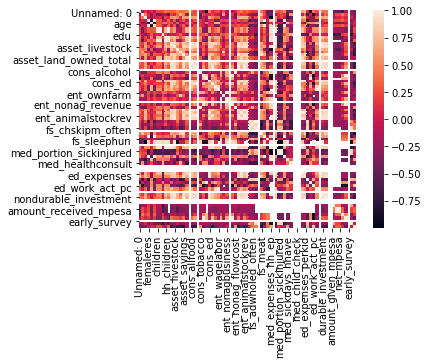

In [33]:
corr = df_mental.corr()
sns.heatmap(corr,  square=True)
plt.show()

In [34]:


#Age Correlatition
df_mental['age'].corr(df_mental['depressed'])



-0.12005917974926537

In [35]:
from scipy import stats
stats.pointbiserialr(df_mental['depressed'],df_mental['age'])

PointbiserialrResult(correlation=-0.12005917974926544, pvalue=0.7411235120935091)

In [36]:
df_mental['depressed'].sum()

2

In [37]:
#Age Correlatition
df_mental['age'].corr(df_mental['depressed'])

-0.12005917974926537

In [38]:
from scipy import stats
stats.pointbiserialr(df_mental['depressed'],df_mental['age'])

PointbiserialrResult(correlation=-0.12005917974926544, pvalue=0.7411235120935091)

In [39]:
df_mental['depressed'].sum()

2


# Distribution

Univariate Distribution


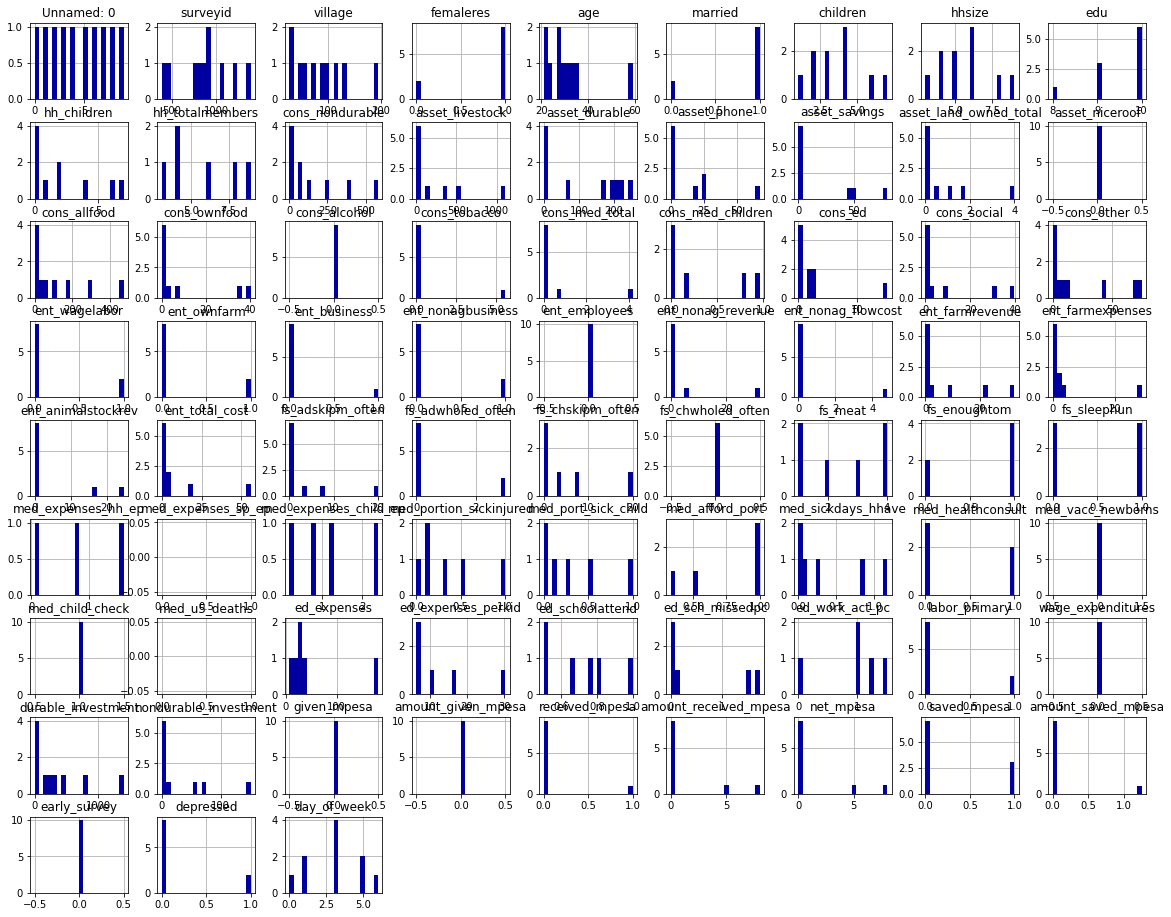

In [41]:


# Distribution
df_mental.hist( bins=20, figsize=(20,16), color='#0000A0', zorder=3, rwidth=5)
plt.show()



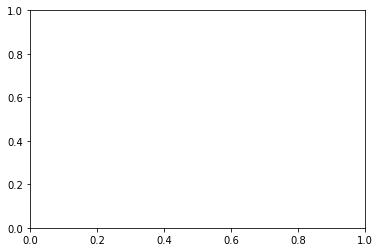

In [47]:
#Age
fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
# df_mental.plot(x = df_mental['age'], y = df_mental['depressed'], ax = ax) 
# h=plt.hist(y = df_mental['age'], x = df_mental['depressed'], bins =10)

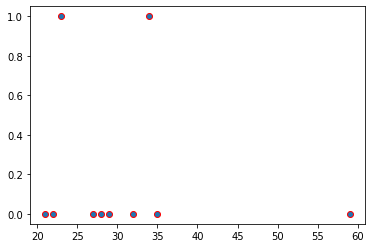

In [48]:
# year = d['YEAR']
# sea_levels = d['CSIRO_SEALEVEL_INCHES']
plt.scatter(x = df_mental['age'], y = df_mental['depressed'], edgecolors='r')
# plt.xlabel('Year')
# plt.ylabel('Sea Level (inches)')
# plt.title('Rise in Sealevel')
plt.show()

<BarContainer object of 10 artists>

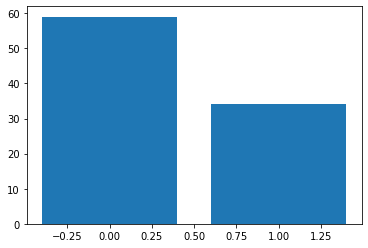

In [49]:
plt.bar(df_mental['depressed'],df_mental['age'])

TypeError: ignored

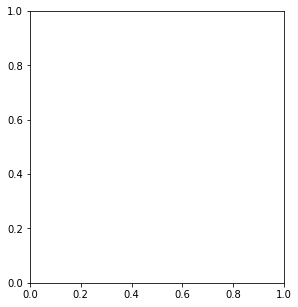

In [50]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df_mental(x = 'age', y='gender', color='purple'))

IndexError: ignored

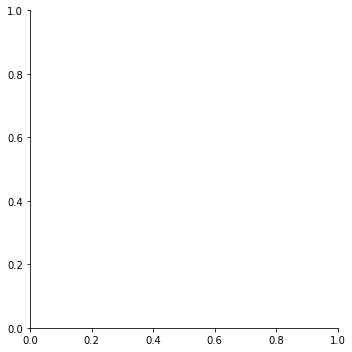

In [51]:


sns.catplot(x= "depressed", y= df_mental.groupby('femaleres')['depressed'].sum(), hue = "femaleres", data = df_mental)




# Data Analysis
1. Gender

In [52]:
#Gender
df_mental.groupby('femaleres')['depressed'].sum()

femaleres
0    1
1    1
Name: depressed, dtype: int64

<function matplotlib.pyplot.show>

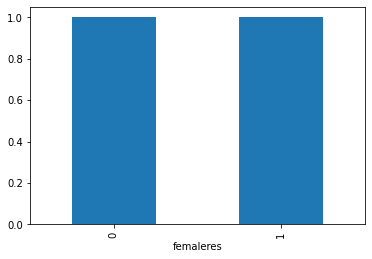

In [53]:
#Bar chart
df_mental.groupby('femaleres')['depressed'].sum().plot(kind='bar')
plt.show

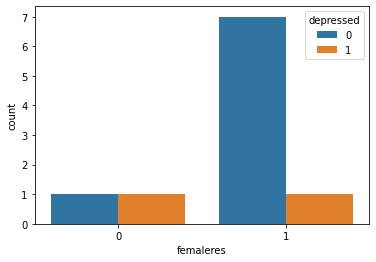

In [54]:
#Depression per Gender Countplot
ax = sns.countplot(x = 'femaleres', hue = 'depressed', data = df_mental)

[Text(0, 0.5, '% Depressed')]

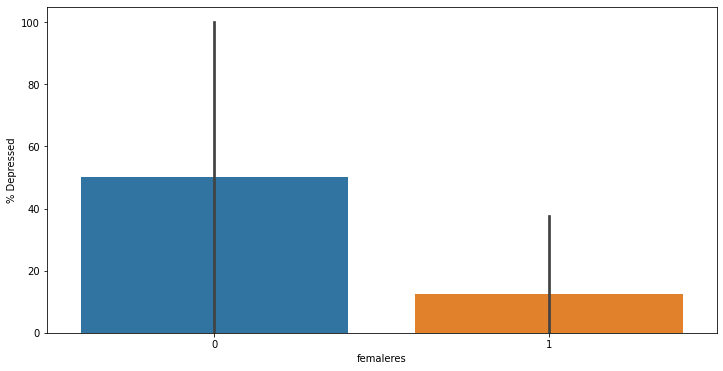

In [55]:
# Percentage of gender versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'femaleres',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")


# **2. Age**

In [57]:


bins = [0,19,26,35,55,65,100]
labels = ['0-18','19-25','26-34','35-54','55-64','65+']
df_mental['age_group'] = pd.cut(df_mental['age'], bins = bins,  labels = labels, right =False)



In [58]:
# df_mental[df_mental['age_group']=='65+']
df_mental.groupby('age_group')['age_group'].count()

age_group
0-18     0
19-25    3
26-34    5
35-54    1
55-64    1
65+      0
Name: age_group, dtype: int64

<function matplotlib.pyplot.show>

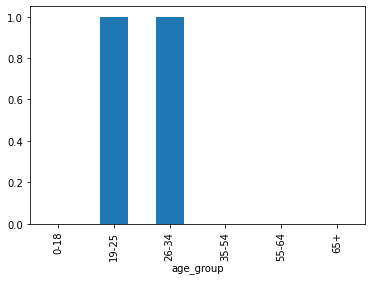

In [59]:
#Diagrammatic representation
df_mental.groupby('age_group')['depressed'].sum().plot(kind='bar')
plt.show

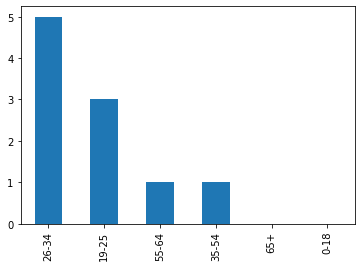

In [60]:
df_mental['age_group'].value_counts().plot(kind='bar')

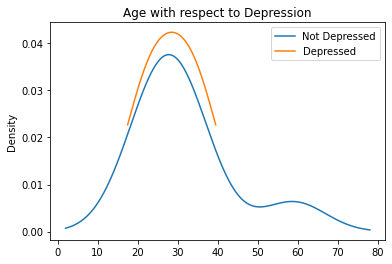

In [61]:
for x in [0,1]:  
    df_mental.age[df_mental.depressed == x].plot(kind="kde")
plt.title("Age with respect to Depression")
plt.legend(("Not Depressed","Depressed"))

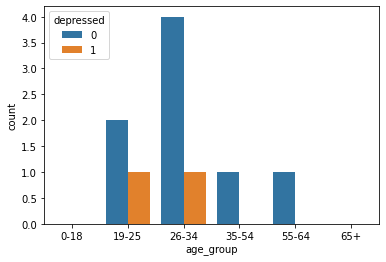

In [62]:
ax = sns.countplot(x = 'age_group', hue = 'depressed', data = df_mental)

[Text(0, 0.5, '% Depressed')]

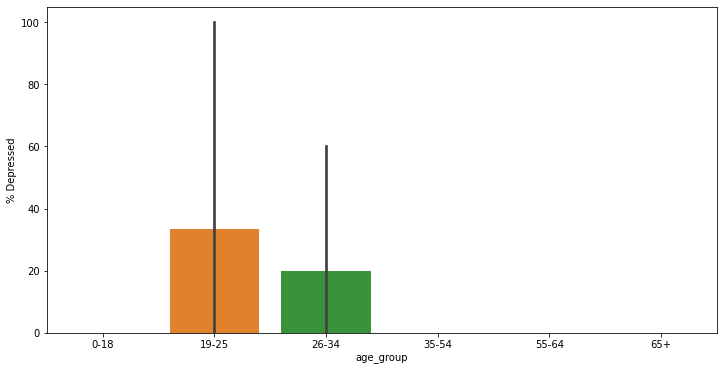

In [63]:
fig, ax = plt.subplots(figsize = (12,6))

ax = sns.barplot(x = 'age_group',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")


# 3. Marital Status

Total Count of Married and Single Persons
married
0    2
1    8
Name: married, dtype: int64
Depression Count by Marital Status
married
0    1
1    1
Name: depressed, dtype: int64
Bar Graph of Depression by Marital Status


[Text(0, 0.5, '% Depressed')]

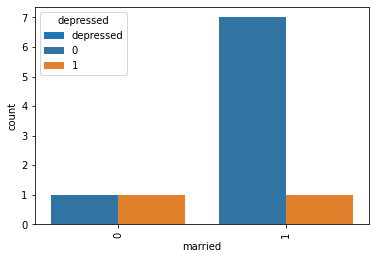

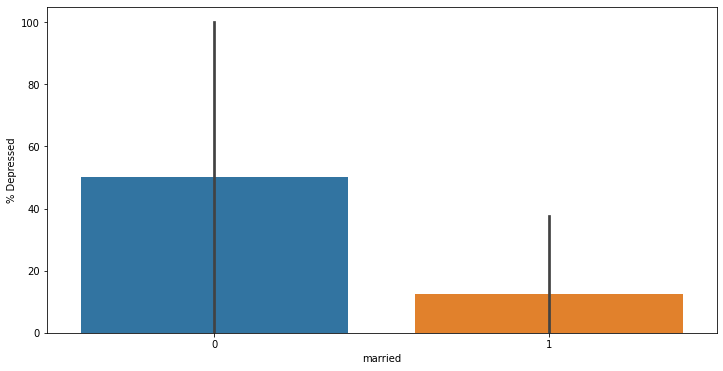

In [64]:
#Marital status versus depression evaluation
## Count of Married versus Single
print("Total Count of Married and Single Persons")
print(df_mental.groupby('married')['married'].count())

## Count of Married versus Single
print("Depression Count by Marital Status")
print(df_mental.groupby('married')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by Marital Status")
df_mental.groupby('married')['depressed'].sum().plot(kind='bar')
plt.show

#Countplot of Depression sum by Marital Status 
ax = sns.countplot(x = 'married', hue = 'depressed', data = df_mental)

# Barplot of Percentage of Marital Status versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'married',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")


# 4. Children

Total Count of No of children per household
hh_children
0    4
1    1
2    2
4    1
6    1
7    1
Name: hh_children, dtype: int64
             count  mean  std  min  25%  50%   75%  max
hh_children                                            
0              4.0  0.25  0.5  0.0  0.0  0.0  0.25  1.0
1              1.0  1.00  NaN  1.0  1.0  1.0  1.00  1.0
2              2.0  0.00  0.0  0.0  0.0  0.0  0.00  0.0
4              1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0
6              1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0
7              1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0
Depression Count by children
hh_children
0    1
1    1
2    0
4    0
6    0
7    0
Name: depressed, dtype: int64
Bar Graph of Depression by number of children


[Text(0, 0.5, '% Depressed')]

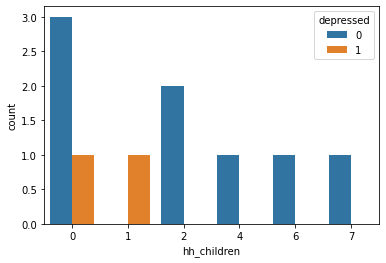

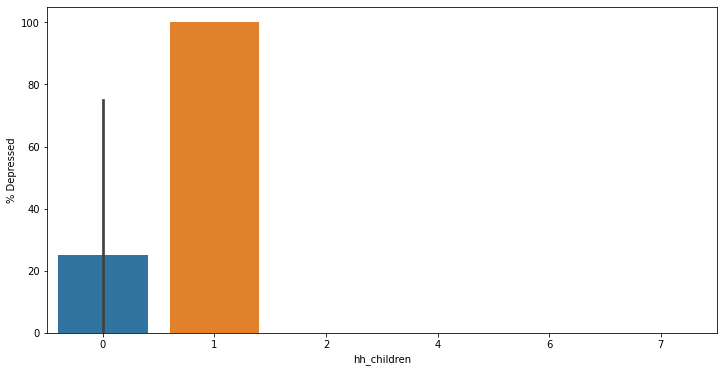

In [65]:
#Children versus depression evaluation
## Count of Children
print("Total Count of No of children per household")
print(df_mental.groupby('hh_children')['hh_children'].count())

print(df_mental.groupby('hh_children')['depressed'].describe())

## Count of depression by number of children
print("Depression Count by children")
print(df_mental.groupby('hh_children')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by number of children")
ax = sns.countplot(x="hh_children", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage of Marital Status versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'hh_children',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

In [66]:
bins = [0, 9, 13, 20]
labels = ['primary','secondary','tertiary']
df_mental['education_level'] = pd.cut(df_mental['edu'], bins = bins,  labels = labels, right =False)

Total Count of No of years of education
education_level
primary      1
secondary    9
tertiary     0
Name: education_level, dtype: int64
                 count      mean       std  min  25%  50%  75%  max
education_level                                                    
primary            1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
secondary          9.0  0.111111  0.333333  0.0  0.0  0.0  0.0  1.0
tertiary           0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
Depression Count by education
education_level
primary      1
secondary    1
tertiary     0
Name: depressed, dtype: int64
Bar Graph of Depression by number of years of education


[Text(0, 0.5, '% Depressed')]

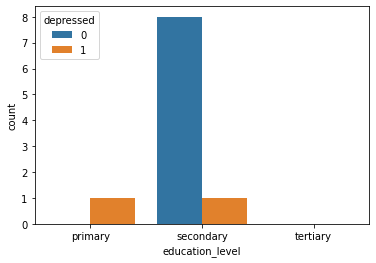

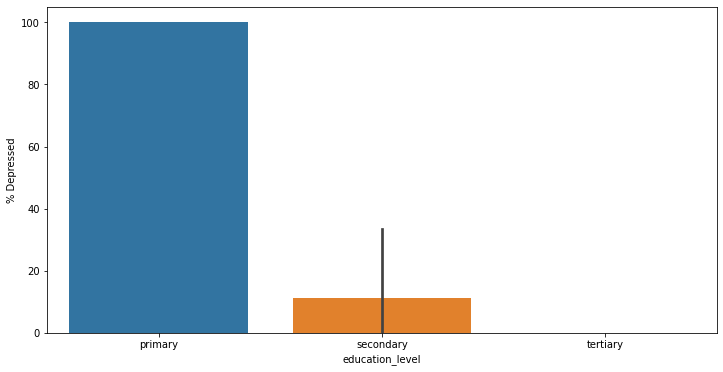

In [67]:
#Education versus depression evaluation
## Count of years of education 
print("Total Count of No of years of education")
print(df_mental.groupby('education_level')['education_level'].count())

print(df_mental.groupby('education_level')['depressed'].describe())

## Count of depression by number of years of education
print("Depression Count by education")
print(df_mental.groupby('education_level')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by number of years of education")
ax = sns.countplot(x="education_level", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage of number of years of education versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'education_level',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

In [69]:


# Categorize by primary source of income 
for index,row in df_mental.iterrows():
  if row['ent_wagelabor'] == 1:
    df_mental.loc[index,'pri_income'] = 'Wage Labor'
  elif row['ent_ownfarm'] == 1:
    df_mental.loc[index,'pri_income'] = 'Farming'
  elif row['ent_business'] == 1:
    df_mental.loc[index,'pri_income'] = 'Non-agric business'
  else:
    df_mental.loc[index,'pri_income'] = 'Others'



Total Count by Primary source of income
pri_income
Farming               2
Non-agric business    1
Others                5
Wage Labor            2
Name: pri_income, dtype: int64
                    count  mean       std  min  25%  50%  75%  max
pri_income                                                        
Farming               2.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0
Non-agric business    1.0   0.0       NaN  0.0  0.0  0.0  0.0  0.0
Others                5.0   0.4  0.547723  0.0  0.0  0.0  1.0  1.0
Wage Labor            2.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0
Depression Count by Primary source of income
pri_income
Farming               0
Non-agric business    0
Others                2
Wage Labor            0
Name: depressed, dtype: int64
Bar Graph of Depression by Primary source of income


[Text(0, 0.5, '% Depressed')]

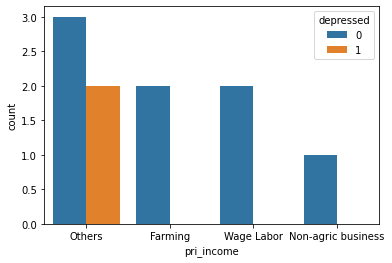

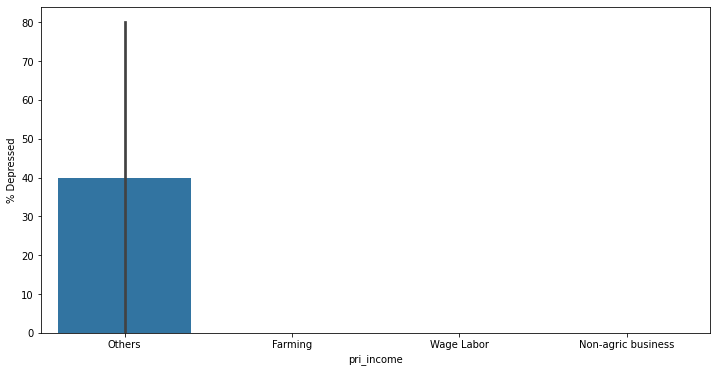

In [70]:
#Primary source of income versus depression evaluation
## Count of Primary source of income 
print("Total Count by Primary source of income")
print(df_mental.groupby('pri_income')['pri_income'].count())

print(df_mental.groupby('pri_income')['depressed'].describe())

## Count of depression by Primary source of income
print("Depression Count by Primary source of income")
print(df_mental.groupby('pri_income')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by Primary source of income")
ax = sns.countplot(x="pri_income", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage by Primary source of income versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'pri_income',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")